# Librerías

In [128]:
# Librerias
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.dates as mdates
from tensorflow import keras
from tensorflow.keras import layers
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.utils import timeseries_dataset_from_array
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.layers import Conv1D, LSTM, Dense

In [129]:
# Cargo el archivo CSV en un DataFrame de Pandas
df = pd.read_csv('final_dataset.csv', parse_dates=['t'], index_col=['t']).drop(columns= ['Unnamed: 0'])
df.head(5)

,symbol,o,h,l,c,v,n,vw,diff,s,...,EPS_Growth,ROE,ROA,Gross_Margin,Operating_Margin,Net_Profit_Margin,Current_Ratio,Debt_to_Equity,FCF,spy_value
t,,,,,,,,,,,,,,,,,,,,,
2018-01-02 09:00:00,BABA,173.46,173.90,173.03,173.77,12094,92,173.478710,1.004939,0.003888,...,352.666667,0.068788,0.033837,0.577516,0.313099,0.289938,1.966388,0.369558,4.475100e+10,266.942485
2018-01-02 10:00:00,BABA,173.90,174.00,173.83,174.00,7456,28,173.896286,1.002407,0.003881,...,352.666667,0.068788,0.033837,0.577516,0.313099,0.289938,1.966388,0.369558,4.475100e+10,266.954651
2018-01-02 11:00:00,BABA,174.15,174.70,174.02,174.58,9966,93,174.341312,1.002559,0.003875,...,352.666667,0.068788,0.033837,0.577516,0.313099,0.289938,1.966388,0.369558,4.475100e+10,267.208979
2018-01-02 12:00:00,BABA,174.50,174.98,174.25,174.72,65516,405,174.598031,1.001473,0.003865,...,352.666667,0.068788,0.033837,0.577516,0.313099,0.289938,1.966388,0.369558,4.475100e+10,267.426118
2018-01-02 13:00:00,BABA,174.68,175.33,174.40,175.00,105976,696,174.928519,1.001893,0.003856,...,352.666667,0.068788,0.033837,0.577516,0.313099,0.289938,1.966388,0.369558,4.475100e+10,267.601109


In [130]:
# Como test, inicio solo creando un modelo para Amazon
data = df[df['symbol'] == 'AMZN' ].drop(columns= ['symbol', 'spy_value'])
data

,o,h,l,c,v,n,vw,diff,s,s12,...,P/B,EPS_Growth,ROE,ROA,Gross_Margin,Operating_Margin,Net_Profit_Margin,Current_Ratio,Debt_to_Equity,FCF
t,,,,,,,,,,,,,,,,,,,,,
2018-04-02 08:00:00,1436.1300,1436.1300,1436.1300,1436.1300,109,2,1436.128349,0.994374,0.006004,0.022935,...,1436.128349,0.739362,0.051775,0.012892,0.319668,0.037999,0.032123,1.057946,0.787973,-4.889000e+09
2018-04-02 11:00:00,1425.0000,1433.7900,1419.0000,1423.0000,18293,377,1424.016657,0.991566,0.006018,0.023020,...,1424.016657,0.739362,0.051775,0.012892,0.319668,0.037999,0.032123,1.057946,0.787973,-4.889000e+09
2018-04-02 12:00:00,1420.0270,1432.5000,1420.0270,1423.0000,37636,770,1425.066294,1.000737,0.006001,0.023108,...,1425.066294,0.739362,0.051775,0.012892,0.319668,0.037999,0.032123,1.057946,0.787973,-4.889000e+09
2018-04-02 13:00:00,1423.0000,1423.0000,1382.5000,1389.5805,1872103,40455,1402.932230,0.984468,0.006097,0.023090,...,1402.932230,0.739362,0.051775,0.012892,0.319668,0.037999,0.032123,1.057946,0.787973,-4.889000e+09
2018-04-02 14:00:00,1389.4550,1400.9999,1380.0000,1380.9300,1844001,39433,1389.776859,0.990623,0.006118,0.023039,...,1389.776859,0.739362,0.051775,0.012892,0.319668,0.037999,0.032123,1.057946,0.787973,-4.889000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31 19:00:00,102.8550,103.4200,102.7200,103.2800,11055710,100115,103.113287,1.001800,0.004432,0.015774,...,103.113287,-0.892857,0.001904,0.000601,-0.009166,0.018446,0.001874,0.944644,0.483022,1.258100e+10
2023-03-31 20:00:00,103.2900,103.3900,103.1132,103.2300,3214600,1885,103.288444,1.001699,0.004420,0.015774,...,103.288444,-0.892857,0.001904,0.000601,-0.009166,0.018446,0.001874,0.944644,0.483022,1.258100e+10
2023-03-31 21:00:00,103.2100,103.3200,103.2100,103.2200,29071,714,103.271878,0.999840,0.004407,0.015774,...,103.271878,-0.892857,0.001904,0.000601,-0.009166,0.018446,0.001874,0.944644,0.483022,1.258100e+10


In [131]:
# Revisando blancos
if data.isnull().any(axis=1).any():
    print("There are blank rows in the dataset")
else:
    print("There are no blank rows in the dataset")


There are no blank rows in the dataset


In [132]:
null_columns = data.columns[data.isnull().any()]
print("Columns with missing values: ", null_columns)

null_counts = data.isnull().sum()
print("\nAmount of missing values in each column:\n", null_counts)


Columns with missing values:  Index([], dtype='object')

Amount of missing values in each column:
 o                     0
h                     0
l                     0
c                     0
v                     0
n                     0
vw                    0
diff                  0
s                     0
s12                   0
emaS                  0
emaM                  0
emaL                  0
ema12L                0
std                   0
pc                    0
pc12                  0
mvS                   0
mvL                   0
mnS                   0
mnL                   0
rsi                   0
rsid                  0
rlmS                  0
rlmL                  0
rlmD                  0
obv                   0
obvmS                 0
obvmL                 0
obvsL                 0
obvSH                 0
lavgv                 0
lavm                  0
lavs                  0
avgv                  0
ewm_12                0
ewm_26                0
macd         

In [133]:
blank_rows = data[data.isnull().any(axis=1)]
print(blank_rows)


Empty DataFrame
Columns: [o, h, l, c, v, n, vw, diff, s, s12, emaS, emaM, emaL, ema12L, std, pc, pc12, mvS, mvL, mnS, mnL, rsi, rsid, rlmS, rlmL, rlmD, obv, obvmS, obvmL, obvsL, obvSH, lavgv, lavm, lavs, avgv, ewm_12, ewm_26, macd, signal, macd_std, macds, financial_data_age, P/E, P/S, P/B, EPS_Growth, ROE, ROA, Gross_Margin, Operating_Margin, Net_Profit_Margin, Current_Ratio, Debt_to_Equity, FCF]
Index: []

[0 rows x 54 columns]


# Se crea dataset a nivel diario (target "close")

Tomando en cuenta una estrategia de inversión semanal y no a tan corto plazo, me hace sentido que tomemos los resultados de cierre diario. Por otra parte, dado que faltan varias horas tambien ayuda a justificar la decisión.

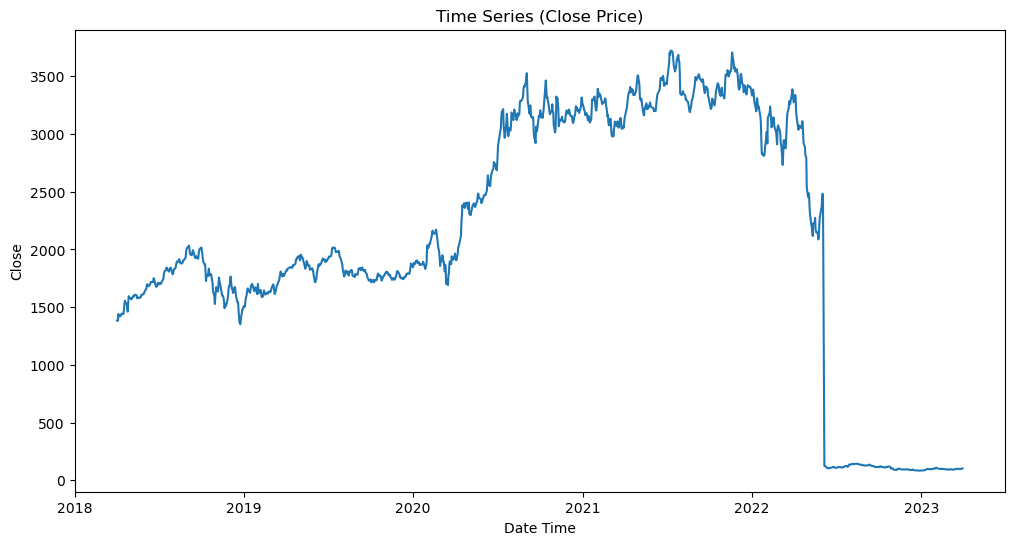

In [158]:
df_daily = data.resample('D').mean()
df_daily = df_daily.dropna() # Se eliminan días sin datos
# Visualiza la serie temporal mensual
plt.figure(figsize=(12, 6))
plt.plot(df_daily['c'])
plt.xlabel('Date Time')
plt.ylabel('Close')
plt.title('Time Series (Close Price)')
plt.show()


In [135]:
blank_rows = df_daily[df_daily.isnull().any(axis=1)]
print(blank_rows)


Empty DataFrame
Columns: [o, h, l, c, v, n, vw, diff, s, s12, emaS, emaM, emaL, ema12L, std, pc, pc12, mvS, mvL, mnS, mnL, rsi, rsid, rlmS, rlmL, rlmD, obv, obvmS, obvmL, obvsL, obvSH, lavgv, lavm, lavs, avgv, ewm_12, ewm_26, macd, signal, macd_std, macds, financial_data_age, P/E, P/S, P/B, EPS_Growth, ROE, ROA, Gross_Margin, Operating_Margin, Net_Profit_Margin, Current_Ratio, Debt_to_Equity, FCF]
Index: []

[0 rows x 54 columns]


In [136]:
df_daily

,o,h,l,c,v,n,vw,diff,s,s12,...,P/B,EPS_Growth,ROE,ROA,Gross_Margin,Operating_Margin,Net_Profit_Margin,Current_Ratio,Debt_to_Equity,FCF
t,,,,,,,,,,,,,,,,,,,,,
2018-04-02,1388.834429,1396.058021,1379.871221,1384.713607,7.459060e+05,17671.785714,1387.508389,0.996065,0.006089,0.022885,...,1387.508389,0.739362,0.051775,0.012892,0.319668,0.037999,0.032123,1.057946,0.787973,-4.889000e+09
2018-04-03,1378.840625,1387.727425,1371.184069,1379.944019,6.373634e+05,13198.375000,1379.932854,1.001016,0.006173,0.022511,...,1379.932854,0.739362,0.051775,0.012892,0.319668,0.037999,0.032123,1.057946,0.787973,-4.889000e+09
2018-04-04,1381.167438,1388.467806,1375.629419,1384.811569,4.328644e+05,9021.750000,1382.643025,1.001336,0.006507,0.023801,...,1382.643025,0.739362,0.051775,0.012892,0.319668,0.037999,0.032123,1.057946,0.787973,-4.889000e+09
2018-04-05,1439.967119,1445.133031,1434.235175,1439.829600,3.986712e+05,8032.937500,1440.863381,1.000695,0.006390,0.024002,...,1440.863381,0.739362,0.051775,0.012892,0.319668,0.037999,0.032123,1.057946,0.787973,-4.889000e+09
2018-04-06,1424.393333,1427.875560,1417.496733,1422.344000,3.853712e+05,8123.533333,1422.925930,0.998663,0.006226,0.023305,...,1422.925930,0.739362,0.051775,0.012892,0.319668,0.037999,0.032123,1.057946,0.787973,-4.889000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-27,98.195937,98.526162,97.877437,98.211562,2.920622e+06,23805.812500,98.240939,0.999949,0.004928,0.016633,...,98.240939,-0.892857,0.001904,0.000601,-0.009166,0.018446,0.001874,0.944644,0.483022,1.258100e+10
2023-03-28,97.483863,97.737512,97.202500,97.423694,2.420961e+06,19568.937500,97.455192,0.999411,0.004816,0.016257,...,97.455192,-0.892857,0.001904,0.000601,-0.009166,0.018446,0.001874,0.944644,0.483022,1.258100e+10
2023-03-29,99.132800,99.555669,98.924813,99.295987,3.111491e+06,23434.875000,99.326797,1.001730,0.004754,0.016575,...,99.326797,-0.892857,0.001904,0.000601,-0.009166,0.018446,0.001874,0.944644,0.483022,1.258100e+10


In [137]:
#Guardo el indice de la columna a predecir para usarlas mas tarde en la creación de secuencias
temp_column_index = df_daily.columns.get_loc('c')
temp_column_index

3

Escalado de datos

In [138]:
#Escalaré los datos para no dar mas a algunas variables (rangos muy distintos)
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df_daily)
df_scaled

array([[0.35877539, 0.36004581, 0.35714748, ..., 0.46828672, 1.        ,
        0.38537887],
       [0.35603051, 0.35776189, 0.35475644, ..., 0.46828672, 1.        ,
        0.38537887],
       [0.35666959, 0.35796487, 0.35597997, ..., 0.46828672, 1.        ,
        0.38537887],
       ...,
       [0.00454732, 0.00459614, 0.0045818 , ..., 0.0310664 , 0.34613189,
        0.90923266],
       [0.0051931 , 0.00521334, 0.00520768, ..., 0.0310664 , 0.34613189,
        0.90923266],
       [0.00550709, 0.00550831, 0.00553759, ..., 0.0310664 , 0.34613189,
        0.90923266]])

Creación de dataset para entrenamiento, validación y test

In [139]:
#Separo los datos en train, validacion y test (aqui primero la cantidad)
num_train_samples = int(0.5 * len(df_daily))
num_val_samples = int(0.25 * len(df_daily))
num_test_samples = len(df_daily) - num_train_samples - num_val_samples
print("Número de train_samples:", num_train_samples)
print("Número de val_samples:", num_val_samples)
print("Número de test_samples:", num_test_samples)

Número de train_samples: 674
Número de val_samples: 337
Número de test_samples: 337


In [140]:
#Inicio lo necesario para crear las secuencias para el modelo. Iré con secuencias de 7 dias tomando todas las variables y el target será solo el close.
temp_column_index = df_daily.columns.get_loc('c') # Columna target
sampling_rate = 1 #Dado que los datos ya estan resumidos por día, se va tomando fila a fila sin saltos
sequence_length = 7 # 7 (7 días anteriores a tomar en cuenta).
delay = sampling_rate * (sequence_length ) #Comienzo del target
batch_size = 32 #La cantidad de batch que creará, cada una con X (samples) e y (target temperatura)

In [141]:
#Crea los dataset para modelo
train_dataset = keras.utils.timeseries_dataset_from_array(
    df_scaled[:-delay],
    targets=df_scaled[:, temp_column_index][delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    df_scaled[:-delay],
    targets=df_scaled[:, temp_column_index][delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    df_scaled[:-delay],
    targets=df_scaled[:, temp_column_index][delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)

In [142]:
#Revisa shape para posterior modelo.
for samples, targets in train_dataset:
    print("samples shape:", samples.shape)
    print("targets shape:", targets.shape)
    break

samples shape: (32, 7, 54)
targets shape: (32,)


Ejemplo de los datos que estaremos pasando al modelo (por cada ejemplo, 54 valores de todas las columnas de 7 dias completos y como target el valor del dia siguiente)

In [143]:
#Un ejemplo de unos datos para poder entender mejor lo creado
#Veo como input los valores de las 14 variables y como target la temperatura
print("Inputs para primer sample:", samples.numpy()[0]) 
print("Targets para primer sample :", targets.numpy()[0])

Inputs para primer sample: [[0.36854196 0.36876892 0.36750346 0.36815706 0.03114535 0.07497746
  0.3681661  0.84621752 0.05796647 0.06762213 0.89028942 0.8851727
  0.80044831 0.79774688 0.3009316  0.42115562 0.76239665 0.36628886
  0.26099655 0.39256985 0.28824368 0.37896305 0.27199664 0.70075249
  0.74529003 0.74051809 0.54936077 0.55519553 0.56800329 0.0368432
  0.4214154  0.58290937 0.63804883 0.00823935 0.41115885 0.37044761
  0.36976399 0.91264132 0.89841937 0.06159162 0.55412394 0.07272727
  0.44432188 0.20143536 0.3681661  0.5335538  0.60820979 0.51247592
  0.32584715 0.30757398 0.47374325 0.46828672 1.         0.38537887]
 [0.36771362 0.36775674 0.36721452 0.36755107 0.02106209 0.05032169
  0.36748077 0.86665172 0.05600754 0.06422717 0.90964351 0.88391756
  0.8020538  0.80225937 0.29457559 0.4952004  0.76632064 0.24988593
  0.24892119 0.28184488 0.27667202 0.47338121 0.60024386 0.61932945
  0.74108359 0.6299022  0.5461146  0.5521084  0.5671021  0.03561792
  0.37485303 0.5349760

# Modelo

Combina capa convolucional para extraer idealmente patrones iniciales de menor dimensionalidad en los datos y luego una LSTM para predicción final y teniendo en cuenta el orden temporal.

In [144]:
sequence_length

7

In [145]:
df_scaled.shape[-1]

54

In [146]:
#Modelo

# Parámetros
epochs = 200
batch_size = 168
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

inputs = keras.Input(shape=(sequence_length, df_scaled.shape[-1]))
x = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
x = layers.LSTM(32, recurrent_dropout=0.1, return_sequences=True)(inputs)
x = layers.LSTM(32, recurrent_dropout=0.1)(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [147]:
model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])
#alternativa probada: optimizer="rmsprop"

In [148]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 7, 54)]           0         
                                                                 
 lstm_4 (LSTM)               (None, 7, 32)             11136     
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 19,489
Trainable params: 19,489
Non-trainable params: 0
_________________________________________________________________


In [149]:
history = model.fit(train_dataset,
 epochs=epochs,
 validation_data=val_dataset, verbose = 0)

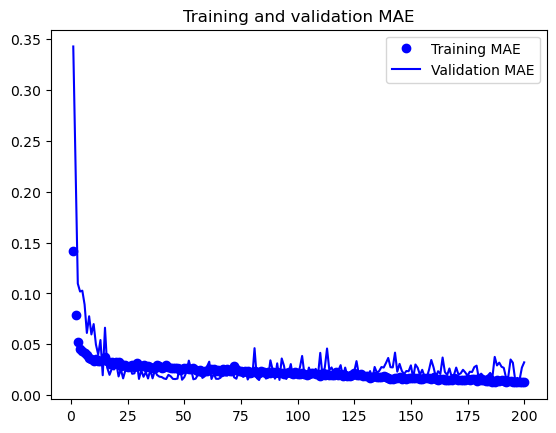

In [150]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

In [151]:
train_mae = history.history["mae"][-1]
val_mae = history.history["val_mae"][-1]

print(f"MAE en el conjunto de entrenamiento: {train_mae:.4f}")
print(f"MAE en el conjunto de validación: {val_mae:.4f}")

MAE en el conjunto de entrenamiento: 0.0130
MAE en el conjunto de validación: 0.0322


# Pruebas con las predicciones

Pequeña prueba de solo un ejemplo

In [152]:
# Test Predict

# Selecciono una secuencia de ejemplo
primer_ejemplo = df_scaled[0 : sequence_length]

# Ajuste shape para que coincida con la entrada esperada por el modelo
primer_ejemplo_reshaped = np.reshape(primer_ejemplo, (1, sequence_length, df_scaled.shape[-1]))

# Hago la predicción usando el modelo
testprediccion = model.predict(primer_ejemplo_reshaped)

print(testprediccion)


1/1 [==============================] - 0s 184ms/step
[[0.38343775]]


Ahora algo que entregue todas las predicciones y las agregue como columna al dataset

In [153]:
#Función que recibe secuencia de datos, modelo y predice. Esta versión si que va rapida al ser vectorizada.
def predict_close(df_scaled, sequence_length, model):
    num_samples = len(df_scaled) - sequence_length
    sequences = np.empty((num_samples, sequence_length, df_scaled.shape[-1]))

    for i in range(num_samples):
        sequences[i] = df_scaled[i : i + sequence_length]

    predictions = model.predict(sequences)
    predictions = np.squeeze(predictions)

    # Rellena los primeros 'sequence_length' valores con NaN
    predictions = [np.nan] * sequence_length + predictions.tolist()

    return predictions

In [154]:
df_scaled.shape

(1348, 54)

In [155]:
# Convierte 'df_scaled' en un DataFrame de pandas
df_scaled_Predicciones = pd.DataFrame(df_scaled, columns=df_daily.columns, index=df_daily.index)

# Obtiene las predicciones usando la función 'predict_temperature'
predictions = predict_close(df_scaled, sequence_length, model)

# Agrega las predicciones como una nueva columna en 'df_scaled'
df_scaled_Predicciones['predictions'] = predictions

42/42 [==============================] - 0s 1ms/step


In [156]:
df_scaled_Predicciones


,o,h,l,c,v,n,vw,diff,s,s12,...,EPS_Growth,ROE,ROA,Gross_Margin,Operating_Margin,Net_Profit_Margin,Current_Ratio,Debt_to_Equity,FCF,predictions
t,,,,,,,,,,,,,,,,,,,,,
2018-04-02,0.358775,0.360046,0.357147,0.357817,0.060291,0.163115,0.358438,0.807758,0.056012,0.065800,...,0.533554,0.60821,0.512476,0.325847,0.307574,0.473743,0.468287,1.000000,0.385379,NaN
2018-04-03,0.356031,0.357762,0.354756,0.356507,0.051516,0.121822,0.356357,0.881035,0.057221,0.064180,...,0.533554,0.60821,0.512476,0.325847,0.307574,0.473743,0.468287,1.000000,0.385379,NaN
2018-04-04,0.356670,0.357965,0.355980,0.357844,0.034985,0.083269,0.357102,0.885781,0.061981,0.069772,...,0.533554,0.60821,0.512476,0.325847,0.307574,0.473743,0.468287,1.000000,0.385379,NaN
2018-04-05,0.372819,0.373500,0.372111,0.372962,0.032221,0.074141,0.373093,0.876294,0.060309,0.070642,...,0.533554,0.60821,0.512476,0.325847,0.307574,0.473743,0.468287,1.000000,0.385379,NaN
2018-04-06,0.368542,0.368769,0.367503,0.368157,0.031145,0.074977,0.368166,0.846218,0.057966,0.067622,...,0.533554,0.60821,0.512476,0.325847,0.307574,0.473743,0.468287,1.000000,0.385379,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-27,0.004290,0.004314,0.004294,0.004318,0.236095,0.219737,0.004313,0.865241,0.039427,0.038707,...,0.256148,0.23123,0.229385,0.000000,0.000000,0.254172,0.031066,0.346132,0.909233,0.101451
2023-03-28,0.004094,0.004098,0.004108,0.004102,0.195703,0.180628,0.004098,0.857278,0.037829,0.037079,...,0.256148,0.23123,0.229385,0.000000,0.000000,0.254172,0.031066,0.346132,0.909233,0.099192
2023-03-29,0.004547,0.004596,0.004582,0.004616,0.251525,0.216313,0.004612,0.891606,0.036940,0.038454,...,0.256148,0.23123,0.229385,0.000000,0.000000,0.254172,0.031066,0.346132,0.909233,0.093690


gráfico final

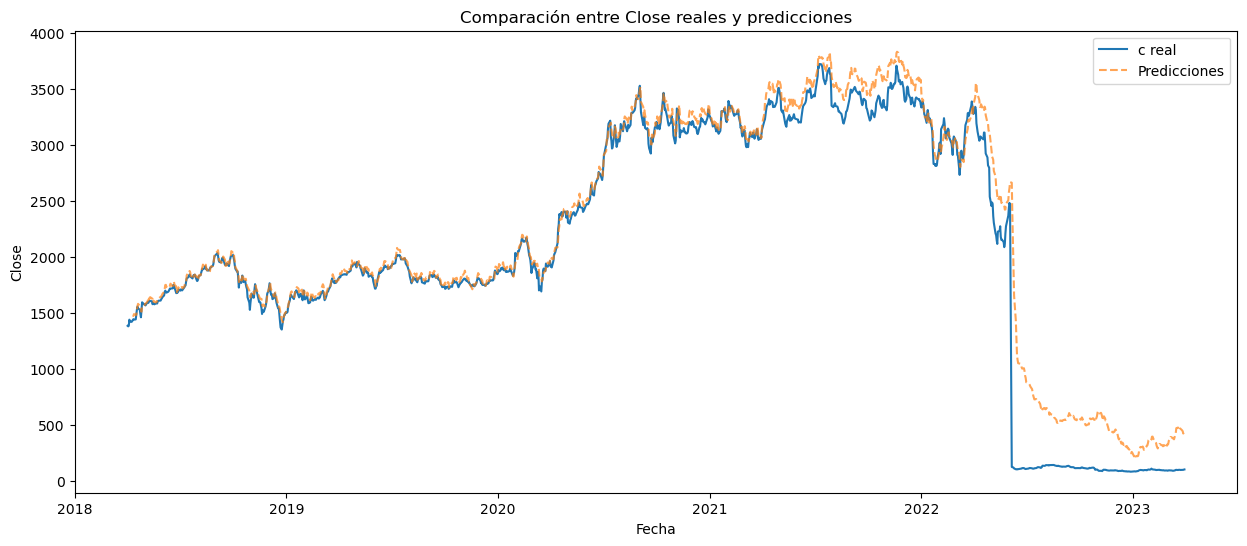

In [157]:
# Encuentro el índice de la columna "c" en el DataFrame original
C_index = df_daily.columns.get_loc('c')

# Obtengo la información de escala (min y max) para la columna "C". 
C_min = scaler.data_min_[C_index]
C_range = scaler.data_range_[C_index]

# Convierte las predicciones a la escala original
predictions_original = (df_scaled_Predicciones[['predictions']] * C_range) + C_min

# Creo un nuevo DataFrame con las columnas "c" y "predictions"
df_comparison = df_daily[['c']].copy()
df_comparison['predictions'] = predictions_original

# CreO un gráfico de línea comparando las temperaturas reales y las predicciones
plt.figure(figsize=(15, 6))
plt.plot(df_comparison.index, df_comparison['c'], label='c real')
plt.plot(df_comparison.index, df_comparison['predictions'], label='Predicciones', linestyle='--', alpha=0.7)
plt.xlabel('Fecha')
plt.ylabel('Close')
plt.title('Comparación entre Close reales y predicciones')
plt.legend()
plt.show()